<center><h1>Machine Learning Evaluation Metrics</h1></center>
<center><i>Part of the Knowledge Journal Project</i></center>

---

**Author:** Augusto Damasceno  
**Project Link:** [github.com/augustodamasceno/knowledge-journal](https://github.com/augustodamasceno/knowledge-journal)  
**Last Updated:** August 19, 2025

---
<div style="text-align: right;">
<small>Copyright © 2022-2025, Augusto Damasceno</small><br>
<small>SPDX-License-Identifier: <code>BSD-2-Clause</code></small>
</div>

## Libraries

In [1]:
# Numpy
import numpy as np 
# Pyplot is a state-based interface to matplotlib. It provides a MATLAB-like way of plotting.
import matplotlib.pyplot as plt
# Display plots that are the output of running code cells  
%matplotlib inline
# Pandas
import pandas as pd
# Train and Test Subsets
from sklearn.model_selection import train_test_split
# Breast Cancer Wisconsin Dataset from Scikit-Learn Toy datasets
from sklearn.datasets import load_breast_cancer
# MLP Classifier
from sklearn.neural_network import MLPClassifier
# Accuracy Metric
from sklearn.metrics import accuracy_score
# Precision Metric
from sklearn.metrics import precision_score
# Recall Metric
from sklearn.metrics import recall_score
# F1 Metric
from sklearn.metrics import f1_score
# Confusion Matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
# Cross-validation Metric
from sklearn.model_selection import cross_val_score

## Breast Cancer Wisconsin Dataset 

![](img/the-dataset.png)

In [2]:
data = load_breast_cancer()

In [3]:
# X = data.data
# y = data.target
X, y = load_breast_cancer(return_X_y=True)

In [4]:
print('Features:\n')
for feature in data.feature_names:
    print('\t', feature)

Features:

	 mean radius
	 mean texture
	 mean perimeter
	 mean area
	 mean smoothness
	 mean compactness
	 mean concavity
	 mean concave points
	 mean symmetry
	 mean fractal dimension
	 radius error
	 texture error
	 perimeter error
	 area error
	 smoothness error
	 compactness error
	 concavity error
	 concave points error
	 symmetry error
	 fractal dimension error
	 worst radius
	 worst texture
	 worst perimeter
	 worst area
	 worst smoothness
	 worst compactness
	 worst concavity
	 worst concave points
	 worst symmetry
	 worst fractal dimension


In [5]:
print('Targets:\n\t', data.target_names)

Targets:
	 ['malignant' 'benign']


In [6]:
# print(data.DESCR)

## Training and Test Subsets

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,shuffle=True, random_state=None)

In [8]:
X_train.shape

(398, 30)

In [9]:
X_test.shape

(171, 30)

In [10]:
y_train.shape

(398,)

In [11]:
y_test.shape

(171,)

## Model Training

In [12]:
clf = MLPClassifier(random_state=None, max_iter=50*X_train.shape[0]).fit(X_train, y_train)

## Model Prediction

In [13]:
y_pred = clf.predict(X_test)

## Model Evaluation with Accuracy
## "All correct predictions"  


$\Large\frac{TP+TN}{TP+FP+TN+FN}$

In [14]:
accuracy_score(y_test, y_pred)

0.9064327485380117

## Model Evaluation with Precision
## "It's really true when it says so."  


$\Large\frac{TP}{TP+FP}$

In [15]:
precision_score(y_test, y_pred, average='binary')

0.9405940594059405

## Model Evaluation with Recall
## "How much predicts positive compare to all real positives."  


$\Large\frac{TP}{TP+FN}$

In [16]:
recall_score(y_test, y_pred, average='binary')

0.9047619047619048

## Model Evaluation with Specificity
## "How much predicts negative compare to all real negatives."   


$\Large\frac{TN}{TN+FP}$

In [17]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
specificity = tn / (tn+fp)
specificity

np.float64(0.9090909090909091)

## Model Evaluation with F1
## "Harmonic mean of precision and recall."   


$\Large\frac{2\cdot Precision \cdot Recall}{Precision + Recall}$

In [18]:
f1_score(y_test, y_pred, average='binary')

0.9223300970873787

## Model Evaluation with Confusion Matrix

tn=60
fp=6
fn=10
tp=95

Confusion matrix, without normalization
[[60  6]
 [10 95]]
tn=60
fp=6
fn=10
tp=95

Normalized confusion matrix
[[0.91 0.09]
 [0.1  0.9 ]]


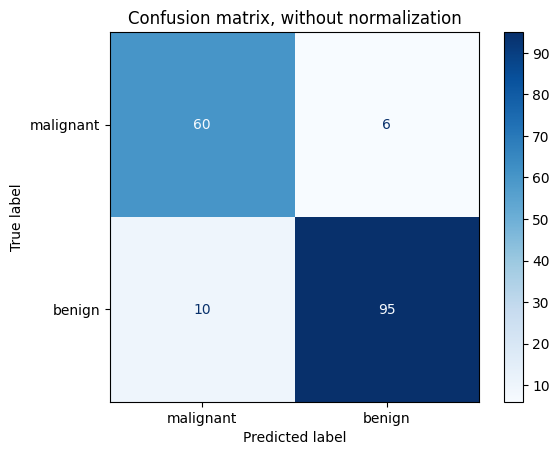

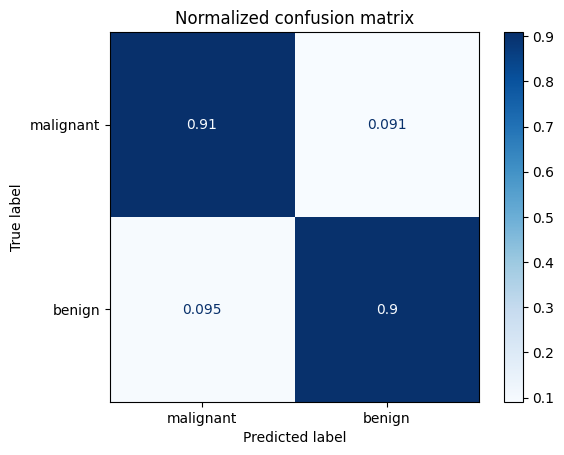

In [19]:
# Code from this cell in reference 15.

np.set_printoptions(precision=2)
class_names = data.target_names

titles_options = [
    ("Confusion matrix, without normalization", None),
    ("Normalized confusion matrix", "true"),
]
for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(
        clf,
        X_test,
        y_test,
        display_labels=class_names,
        cmap=plt.cm.Blues,
        normalize=normalize,
    )
    disp.ax_.set_title(title)

    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    print("tn={}\nfp={}\nfn={}\ntp={}\n".format(tn, fp, fn, tp))
    print(title)
    print(disp.confusion_matrix)

plt.show()

## Model Evaluation with Cross-validation

![](img/cross-validation.jpg)

In [20]:
scores = cross_val_score(clf, X, y, cv=5)
scores

array([0.92, 0.93, 0.89, 0.93, 0.94])

In [21]:
np.mean(scores)

np.float64(0.92094395280236)

In [22]:
np.std(scores)

np.float64(0.018297531703108907)

# References

*  1. [Python DOC](https://docs.python.org/3/)  
*  2. [Numpy DOC](https://numpy.org/doc/1.18/reference/index.html)
*  3. [matplotlib.pyplot](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.html#module-matplotlib.pyplot)
*  4. [ipython magic functions](https://ipython.readthedocs.io/en/stable/interactive/tutorial.html#magics-explained)
*  5. [Pandas DOC](https://pandas.pydata.org/docs/reference/index.html)
*  6. [Breast Cancer Wisconsin Dataset](https://scikit-learn.org/stable/datasets/toy_dataset.html#breast-cancer-dataset)
*  7. [sklearn.model_selection.train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html#sklearn.model_selection.train_test_spli)
*  8. [sklearn.neural_network.MLPClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html)
*  9. [sklearn.metrics.accuracy_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html)
* 10. [sklearn.metrics.precision_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html)
* 11. [sklearn.metrics.recall_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html)
* 12. [sklearn.metrics.f1_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html)
* 13. [Harmonic Mean](https://mathworld.wolfram.com/HarmonicMean.html)
* 14. [sklearn.metrics.confusion_matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html)
* 15. [https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html](https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html)
* 16. [Cross-validation](https://scikit-learn.org/stable/modules/cross_validation.html)